In [39]:
import pandas

In [13]:
# чтобы вывести всю таблицу на экран
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [19]:
# creating a dataframe
app_stats = pandas.read_csv(
    "C:\\Users\\HOME\\ya_datasets\\app_stats.csv",
index_col='week_number')
print(app_stats)

             installs  payments  ad_campaign
week_number                                 
0               29486      3541            0
1               30830      4275            0
2               31970      4404            0
3               34361      4463            0
4               33968      4358            0
5               34912      4310            0
6               35118      4427            0
7               49296      6836            1
8               35969      4366            0
9               50182      6426            1
10              37169      4774            0
11              36579      5082            0
12              38198      5025            0
13              55226      6420            1
14              38932      4804            0
15              51316      6299            1
16              38067      4884            0
17              57437      6146            1
18              39399      5084            0
19              53167      6276            1
20        

In [20]:
app_stats.columns

Index(['installs', 'payments', 'ad_campaign'], dtype='object')

In [21]:
app_stats.head()

,installs,payments,ad_campaign
week_number,,,
0,29486,3541,0
1,30830,4275,0
2,31970,4404,0
3,34361,4463,0
4,33968,4358,0


In [22]:
app_stats.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51],
           dtype='int64', name='week_number')

In [23]:
app_stats.columns

Index(['installs', 'payments', 'ad_campaign'], dtype='object')

<Axes: >

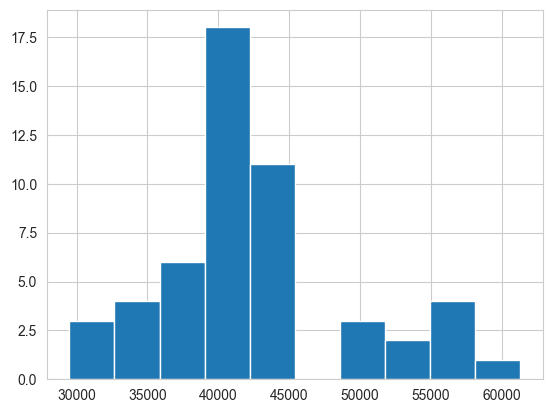

In [24]:
app_stats['installs'].hist()

In [25]:
# первые строки
print(app_stats.head())

             installs  payments  ad_campaign
week_number                                 
0               29486      3541            0
1               30830      4275            0
2               31970      4404            0
3               34361      4463            0
4               33968      4358            0


In [26]:
# общая информация
print(app_stats.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   installs     52 non-null     int64
 1   payments     52 non-null     int64
 2   ad_campaign  52 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB
None


### 1) Что лежить в installs?

In [27]:
print(app_stats["installs"])

week_number
0     29486
1     30830
2     31970
3     34361
4     33968
5     34912
6     35118
7     49296
8     35969
9     50182
10    37169
11    36579
12    38198
13    55226
14    38932
15    51316
16    38067
17    57437
18    39399
19    53167
20    40214
21    40509
22    39718
23    40657
24    39687
25    41552
26    39687
27    40661
28    40858
29    52182
30    42268
31    55288
32    41486
33    61326
34    40925
35    41980
36    42405
37    41314
38    42022
39    41540
40    42007
41    42461
42    42310
43    42893
44    42107
45    57536
46    42636
47    42833
48    43881
49    43678
50    44071
51    43063
Name: installs, dtype: int64


### 2) Базовая статистика по installs
***Среднее чуть больше медианы, значит, всплески небольшие.***

In [28]:
print(app_stats["installs"].describe())

count       52.000000
mean     42448.788462
std       6874.099469
min      29486.000000
25%      39282.250000
50%      41546.000000
75%      43216.750000
max      61326.000000
Name: installs, dtype: float64


### 3) Найдем неделю с максимальными установками

In [29]:
max_installs_week = app_stats["installs"].idxmax()
max_installs_value = app_stats["installs"].max()

print("Неделя с максимумом installs:", max_installs_week)
print("Количество installs:", max_installs_value)

Неделя с максимумом installs: 33
Количество installs: 61326


### 4) Проверим корреляцию

**```payments``` - это количество пользователей, купивших платную версию приложения**
**```ad_campaign``` - это количество проведённых рекламных кампаний в каждую из недель**

In [31]:
print(app_stats[["installs", "payments"]].corr())

          installs  payments
installs  1.000000  0.907688
payments  0.907688  1.000000


## Что показывает корреляция?

- **0.91 — это очень сильная положительная корреляция**
- когда растут installs, почти всегда растут payments
- связь линейная и устойчивая

### Между количеством установок и количеством пользователей, купивших платную версию приложения, наблюдается сильная положительная корреляция (≈ 0.91).

In [32]:
print(app_stats["ad_campaign"])

week_number
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    1
32    0
33    1
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    1
46    0
47    0
48    0
49    0
50    0
51    0
Name: ad_campaign, dtype: int64


In [33]:
print(app_stats.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51],
           dtype='int64', name='week_number')


In [34]:
print(app_stats.columns)

Index(['installs', 'payments', 'ad_campaign'], dtype='object')


In [38]:
# Каждая строка отражает агрегированные данные за одну неделю (week_number):
# installs — количество пользователей, установивших приложение за неделю
# payments — количество пользователей, купивших платную версию за неделю
# ad_campaign — количество проведенных рекламных кампаний в эту неделю
print(app_stats.head())

             installs  payments  ad_campaign  conversion
week_number                                             
0               29486      3541            0    0.120091
1               30830      4275            0    0.138664
2               31970      4404            0    0.137754
3               34361      4463            0    0.129886
4               33968      4358            0    0.128297


In [37]:
app_stats["conversion"] = app_stats["payments"] / app_stats["installs"]
print(app_stats["conversion"].describe())

count    52.000000
mean      0.127176
std       0.007527
min       0.104295
25%       0.123112
50%       0.128255
75%       0.132334
max       0.138932
Name: conversion, dtype: float64
